In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import scipy.cluster.hierarchy as shc

In [2]:
df= pd.read_csv('Zeel_analytics_data.csv',skiprows=6)

In [3]:
df.head()

,Age,Affinity Category (reach),Gender,Region,Device Category,Sessions,Avg. Session Duration,Pages / Session,All 5 Flow Conversions
0,25-34,Media & Entertainment/Movie Lovers,female,California,desktop,"1,775",0:04:27,6.16,40
1,25-34,Media & Entertainment/Movie Lovers,male,California,desktop,"1,642",0:03:07,5.91,29
2,25-34,Lifestyles & Hobbies/Art & Theater Aficionados,female,California,desktop,"1,599",0:04:44,6.19,40
3,25-34,Shoppers/Value Shoppers,female,California,desktop,"1,569",0:04:23,6.16,40
4,25-34,Travel/Travel Buffs,female,California,desktop,"1,551",0:04:26,6.23,43


In [4]:
df.shape

(20000, 9)

In [5]:
#dummy variables
df=pd.get_dummies(df)

In [6]:
#check if anything is null
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [7]:
#load in X and y
X = df.loc[:, df.columns != 'All 5 Flow Conversions']
y = df['All 5 Flow Conversions']
X = pd.get_dummies(X)

In [8]:
#run random forest and fit
rf = RandomForestRegressor(n_estimators=100)

In [9]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [10]:
#load in importance features using random forest
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.round(rf.feature_importances_, 3)
}).sort_values(by='Importance', ascending=False)

In [11]:
importances
#Pages/Session
#Age_25-34
#Region - Cali/New York
#Age 35-44
#Region Texas
#Gender
#Device

,Feature,Importance
0,Pages / Session,0.287
2,Age_25-34,0.083
128,Region_California,0.062
161,Region_New York,0.058
3,Age_35-44,0.027
175,Region_Texas,0.024
119,Gender_male,0.020
118,Gender_female,0.017
184,Device Category_mobile,0.014
1,Age_18-24,0.008


In [12]:
# keep the top 25
vals_to_keep = importances['Feature'][:25].values.tolist()

In [13]:
# standardize data
data_for_cluster = (X[vals_to_keep] - X[vals_to_keep].mean()) / X[vals_to_keep].std()

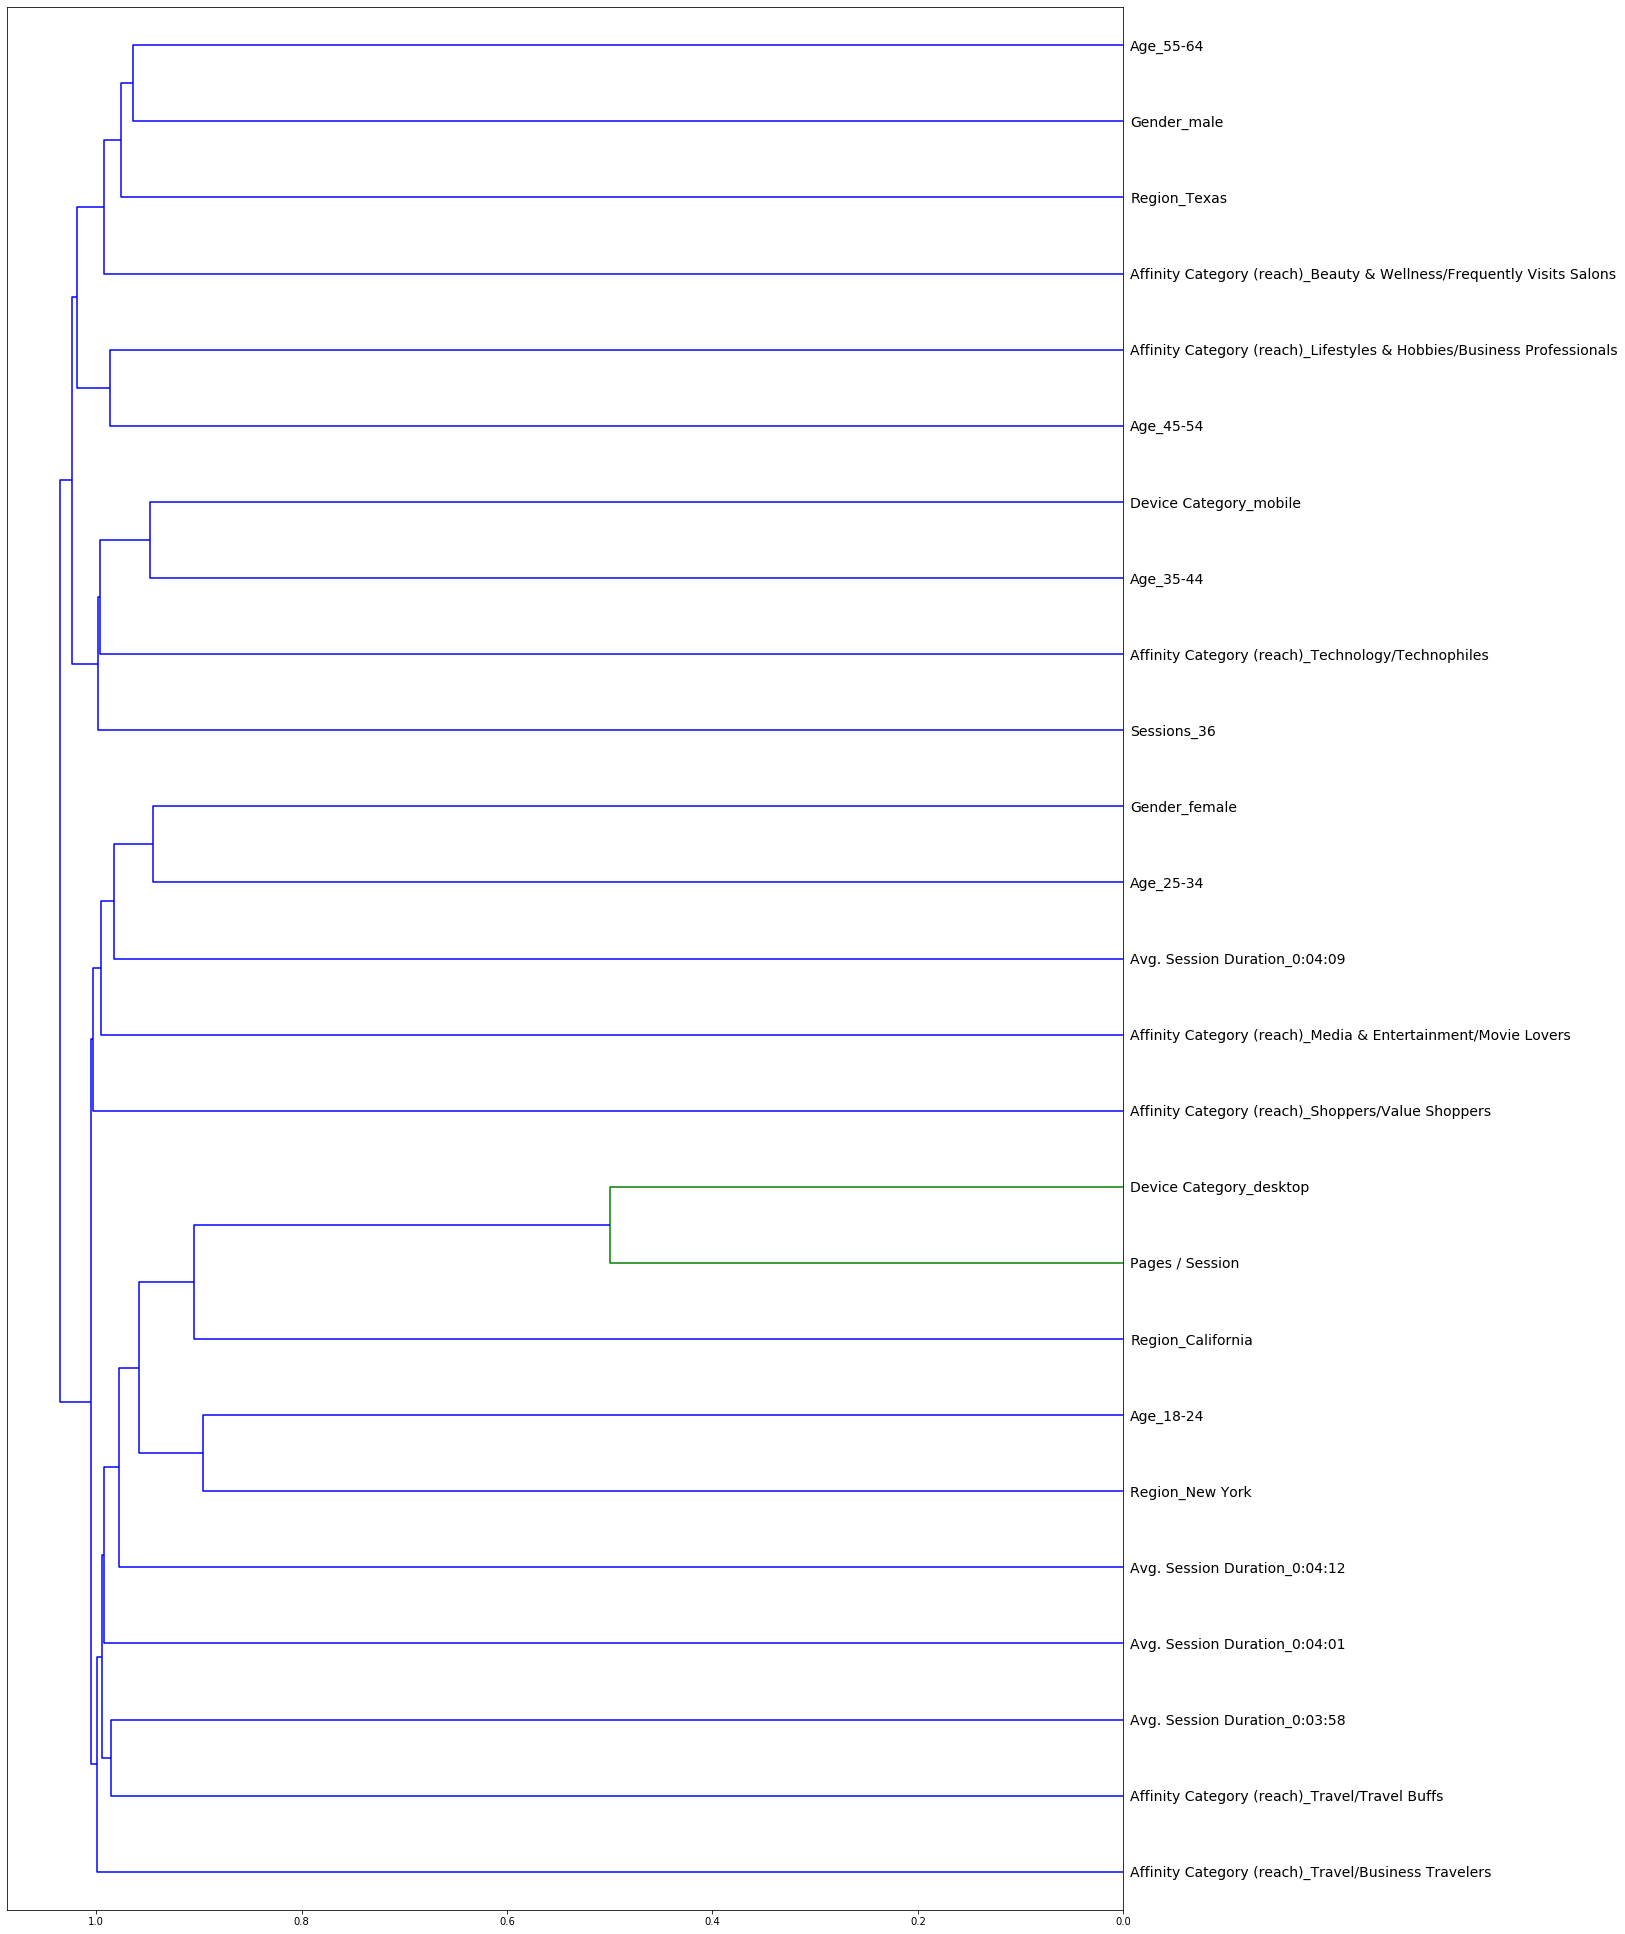

In [14]:
# create the dendrogram
from scipy.cluster import hierarchy as hc
from scipy.stats import spearmanr as sp
import matplotlib.pyplot as plt
%matplotlib inline

corr = np.round(sp(data_for_cluster).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,35))
dendrogram = hc.dendrogram(z, labels=vals_to_keep, orientation='left', leaf_font_size=14)
plt.show()

In [15]:
#Things that are linked:
#Device - Time using website - California - 18-24
#Female - Age 25-34 - Interest in Media/Entertainment - Shoppers
#Male - Texas - Age 55-64 and 45-54 - Banking - Finance

In [27]:
df2= pd.read_csv('Zeel_analytics_data.csv',skiprows=6,usecols=[0,1,2,3,4])

In [28]:
df2.head()

,Age,Affinity Category (reach),Gender,Region,Device Category
0,25-34,Media & Entertainment/Movie Lovers,female,California,desktop
1,25-34,Media & Entertainment/Movie Lovers,male,California,desktop
2,25-34,Lifestyles & Hobbies/Art & Theater Aficionados,female,California,desktop
3,25-34,Shoppers/Value Shoppers,female,California,desktop
4,25-34,Travel/Travel Buffs,female,California,desktop


In [29]:
pd.get_dummies(df2)

,Age_18-24,Age_25-34,Age_35-44,Age_45-54,Age_55-64,Age_65+,Affinity Category (reach)_Banking & Finance/Avid Investors,Affinity Category (reach)_Beauty & Wellness/Beauty Mavens,Affinity Category (reach)_Beauty & Wellness/Frequently Visits Salons,Affinity Category (reach)_Food & Dining/Coffee Shop Regulars,...,Region_Utah,Region_Uttar Pradesh,Region_Victoria,Region_Virginia,Region_Washington,Region_West Bengal,Region_Wisconsin,Device Category_desktop,Device Category_mobile,Device Category_tablet
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


ValueError: could not convert string to float: '25-34'

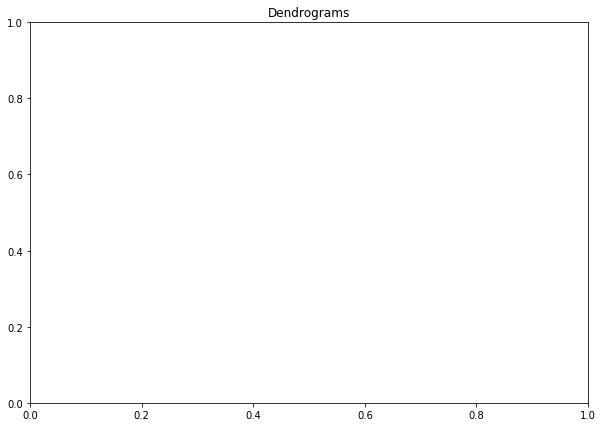

In [30]:
#create alternate dendogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df2, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [31]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2)

ValueError: could not convert string to float: '25-34'

In [32]:
plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=cluster.labels_, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 720x504 with 0 Axes>